In [1]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
from visualization_manager import VisualizationManager
import ImperialOptModules  # MODIFIED modules used for optimizing FLORIS
import imp
import time

## Case 1

### No Optimisation 

Time to compute wake =  0.006871223449707031 s
Initial Power Output =  5.102218332510335  MW


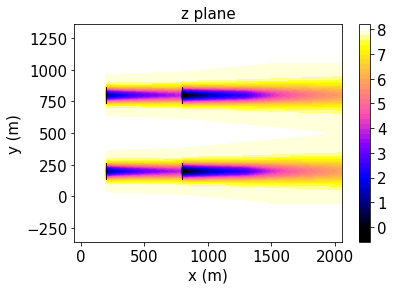

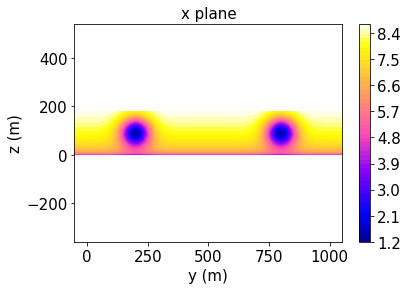

<Figure size 432x288 with 0 Axes>

In [2]:
floris = Floris("case2.json")

name = 'case2_init'

t1 = time.time()

# determine initial power production
floris.farm.flow_field.calculate_wake()

t2 = time.time()
print('Time to compute wake = ', t2-t1, 's')

turbines    = [turbine for _, turbine in floris.farm.flow_field.turbine_map.items()]
init_power = ImperialOptModules.calc_power(floris)
print('Initial Power Output = ', init_power/10**6, ' MW')

# plot
ff_viz = floris.farm.flow_field
visualization_manager = VisualizationManager(ff_viz, name)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

### Optimise Power Output for Turbine Locations Only with Basin-Hopping

In [ ]:
# reinitialise floris and process input file
#imp.reload(ImperialOptModules)
name = 'case2_loc'

num_turbines = len(turbines)
variables=['layout_x', 'layout_y']

# set bounds for the optimization on the turbine locations
minimum_values = [0.0, 0.0]
maximum_values = [1000.0, 1000.0]

# compute the optimal turbine locations
t1 = time.time()
opt_params, opt_power = ImperialOptModules.optimise_func(floris, variables, minimum_values, maximum_values, name, global_search=True)
t2 = time.time()
print('Time to optimise wake for locations only = ', t2-t1, 's')

Optimizing...
Number of parameters to optimize =  8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.692876241
            Iterations: 3
            Function evaluations: 31
            Gradient evaluations: 3
basinhopping step 0: f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.693037755
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 1: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
found new global minimum on step 1 with function value -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.69306442
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 2: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
found new global minimum on step 2 w

/usr/local/lib/python3.7/site-packages/floris/wake_velocity.py:226: RuntimeWarning: invalid value encountered in sqrt
  velDef = (U_local*(1-np.sqrt(1-((Ct*np.cos(yaw))/(8.0*sigma_y*sigma_z/D**2)) ) )*totGauss)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.317664237
            Iterations: 22
            Function evaluations: 232
            Gradient evaluations: 22
basinhopping step 7: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.333862647
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 4
basinhopping step 8: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.335356697
            Iterations: 3
            Function evaluations: 32
            Gradient evaluations: 3
basinhopping step 9: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -68901

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.355976686
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 35: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.354948735
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 36: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.36076444
            Iterations: 2
            Function evaluations: 31
            Gradient evaluations: 2
basinhopping step 37: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -689014

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.347071752
            Iterations: 1
            Function evaluations: 21
            Gradient evaluations: 1
basinhopping step 62: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.347788708
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 63: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6890144.349047322
            Iterations: 1
            Function evaluations: 10
            Gradient evaluations: 1
basinhopping step 64: f -6.89014e+06 trial_f -6.89014e+06 accepted 1  lowest_f -6.89014e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -68901

### Optimise Power Output for Yaw Angle after Turbine Location with Basin-Hopping

In [ ]:
name = 'case2_loc_yaw'

variables=['yaw_angle']

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-0.5]
maximum_values = [0.5]

# compute the optimal yaw angles
t1 = time.time()
opt_params, opt_power = ImperialOptModules.optimise_func(floris, variables, minimum_values, maximum_values, name, global_search=True)
t2 = time.time()
print('Time to optimise wake for yaw angles only = ', t2-t1, 's')

### Optimise Power Output for Yaw Angle Only with Basin-Hopping

In [ ]:
# reinitialise floris and process input file
#imp.reload(ImperialOptModules)
floris = Floris("case2.json")
name = 'case2_yaw'

variables=['yaw_angle']

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-0.5]
maximum_values = [0.5]

# compute the optimal yaw angles
t1 = time.time()
opt_params, opt_power = ImperialOptModules.optimise_func(floris, variables, minimum_values, maximum_values, name, global_search=True)
t2 = time.time()
print('Time to optimise wake for yaw angles only = ', t2-t1, 's')

##### 